# Importing the libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import itertools
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional

# Loading the preprocessed data

In [37]:
data=np.load('preprocessed.npz')
trainx,trainy,testx,testy,validx,validy=data['arr_0'],data['arr_1'],data['arr_2'],data['arr_3'],data['arr_4'],data['arr_5']

print(trainx.shape)
print(trainy.shape)

print(testx.shape)
print(testy.shape)

print(validx.shape)
print(validy.shape)

(10240,)
(10240,)
(1267,)
(1267,)
(1284,)
(1284,)


# Converting the data to Tfidf vectors for classification

In [38]:
def get_string(l):
    s=""
    for i in l:
        s+=i;
        s+=" "
    return s

In [39]:
def get_dataframe(data,label):
    for i in range(len(data)):
        data[i]=get_string(data[i])
    return data
    
    

In [40]:
x_train=get_dataframe(trainx,trainy)
x_test=get_dataframe(testx,testy)
x_valid=get_dataframe(validx,validy)

In [41]:
print(x_train)

['say anni list polit group support thirdtrimest abort demand '
 'declin coal start start natur ga took start begin presid georg w bush administr '
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran '
 ...
 'say altern social secur oper galveston counti texa ha meant particip retir whole lot money social secur '
 'lift us cuban embargo allow travel cuba '
 'depart veteran affair ha manual tell veteran stuff like realli valu commun know encourag commit suicid ']


In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)
tfidf_valid = tfidf_vectorizer.transform(x_valid)

In [43]:
print(tfidf_train)

  (0, 7415)	0.12128257979647988
  (0, 1254)	0.4760557484752034
  (0, 5212)	0.33929947122826887
  (0, 6569)	0.3055257015485277
  (0, 4090)	0.3055257015485277
  (0, 8212)	0.22068959260719412
  (0, 8462)	0.45582476153165036
  (0, 974)	0.2644315558166556
  (0, 2822)	0.3611665310771048
  (1, 2769)	0.27259275787537385
  (1, 2289)	0.2796362423664109
  (1, 8009)	0.6796997249606986
  (1, 5812)	0.2742369297954397
  (1, 3851)	0.22284010182135267
  (1, 8547)	0.2017960877204538
  (1, 1603)	0.2666375765916097
  (1, 6687)	0.14785607093615724
  (1, 3921)	0.22239858605546087
  (1, 1925)	0.19741795026163655
  (1, 1046)	0.19628495970522744
  (2, 3921)	0.30020235047510413
  (2, 1925)	0.2664825066816798
  (2, 4329)	0.25687157024327884
  (2, 2268)	0.24116459769692017
  (2, 1102)	0.35808796158409395
  :	:
  (10237, 6304)	0.285042126196937
  (10237, 1188)	0.3070218316615694
  (10237, 5484)	0.3225111591272156
  (10237, 3862)	0.3380004865928618
  (10238, 5184)	0.4196940739301021
  (10238, 1174)	0.28254243892623

# Function for plotting the confusion matrix

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial Naive bayes classsifier 

Test accuracy:   0.607
Valid accuracy:   0.614
Confusion matrix, without normalization


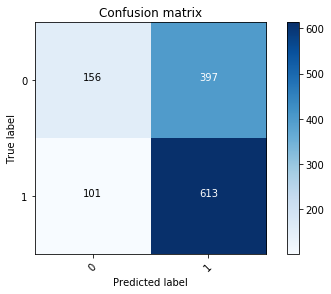

In [45]:
clf = MultinomialNB()
clf.fit(tfidf_train, trainy)
pred = clf.predict(tfidf_test)
y_pred2=forest_clf.predict(tfidf_valid)
score = metrics.accuracy_score(testy, pred)
score2=metrics.accuracy_score(validy,y_pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(testy, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0,1])

# Logistic Regression 

C:\Users\Gourav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy:   0.608
Valid accuracy:   0.621
Confusion matrix, without normalization


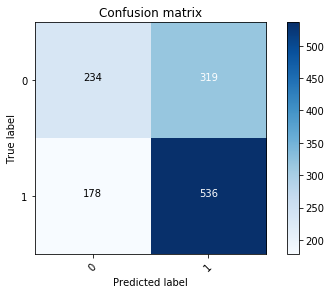

In [46]:
reg=LogisticRegression()
reg.fit(tfidf_train, trainy)
pred = reg.predict(tfidf_test)
y_pred2=reg.predict(tfidf_valid)
score = metrics.accuracy_score(testy, pred)
score2=metrics.accuracy_score(validy,y_pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(testy, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0,1])

# Gaussian Naive Baiyes

# Xgboost classifier

Test accuracy:   0.593
Valid accuracy:   0.581
Confusion matrix, without normalization


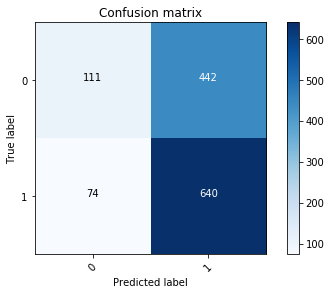

In [47]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(tfidf_train, trainy)
y_pred = xgb_model.predict(tfidf_test)
y_pred2=xgb_model.predict(tfidf_valid)
score = metrics.accuracy_score(testy, y_pred)
score2=metrics.accuracy_score(validy,y_pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(testy, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0,1])

# Random Forest Classifier

Test accuracy:   0.608
Valid accuracy:   0.614
Confusion matrix, without normalization


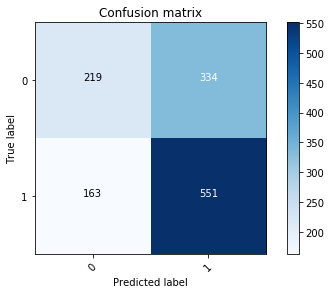

In [48]:
forest_clf=RandomForestClassifier(n_estimators=500)
forest_clf.fit(tfidf_train,trainy)
y_pred=forest_clf.predict(tfidf_test)
y_pred2=forest_clf.predict(tfidf_valid)
score = metrics.accuracy_score(testy, y_pred)
score2=metrics.accuracy_score(validy,y_pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(testy, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0,1])

# SVM model

Test accuracy:   0.564
Valid accuracy:   0.520
Confusion matrix, without normalization


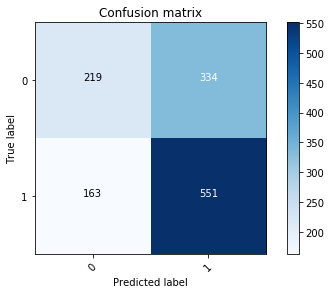

In [49]:
svm_classifier=svm.SVC(gamma='scale')
svm_classifier.fit(tfidf_train, trainy)
svm_pred=svm_classifier.predict(tfidf_test)
svm_pred2=svm_classifier.predict(tfidf_valid)
score = metrics.accuracy_score(testy, svm_pred)
score2 = metrics.accuracy_score(validy, svm_pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(testy, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0,1])

# Glove Preprocessing for the neural network

In [50]:
l=[]
l.extend(trainx)
l.extend(testx)
l.extend(validx)

In [51]:
vocab=set()
for i in l:
    lst=i.split()
    for j in lst:
        vocab.add(j)
vocab_size=len(vocab)
print(vocab_size)

10540


In [52]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(l)

In [53]:
print(len(vocab))

10540


In [54]:
sequences_train = tokenizer.texts_to_sequences(trainx)
sequences_test = tokenizer.texts_to_sequences(testx)
sequences_valid = tokenizer.texts_to_sequences(validx)

In [55]:
maxlen=100

In [56]:
data_train = pad_sequences(sequences_train, maxlen=maxlen)
data_test = pad_sequences(sequences_test, maxlen=maxlen)
data_val = pad_sequences(sequences_valid , maxlen=maxlen)

In [57]:
print(data_train.shape)
print(data_test.shape)
print(data_val.shape)
data_train=data_train/vocab_size
data_test=data_test/vocab_size
data_val=data_val/vocab_size

(10240, 100)
(1267, 100)
(1284, 100)


In [58]:
print(data_train.shape)

(10240, 100)


# Neural Network

In [59]:
model = Sequential()
model.add(Embedding(vocab_size, 100,input_length=maxlen,mask_zero=True))
model.add(Bidirectional(LSTM(64,dropout=0.4)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(data_train, trainy, epochs=10, batch_size=128, validation_data=(data_val,validy))

Train on 10240 samples, validate on 1284 samples
Epoch 1/10
10240/10240 [==============================] - 65s 6ms/step - loss: 0.6864 - acc: 0.5616 - val_loss: 0.6925 - val_acc: 0.5202
Epoch 2/10
10240/10240 [==============================] - 59s 6ms/step - loss: 0.6849 - acc: 0.5617 - val_loss: 0.7005 - val_acc: 0.5202
Epoch 3/10
10240/10240 [==============================] - 53s 5ms/step - loss: 0.6847 - acc: 0.5617 - val_loss: 0.6955 - val_acc: 0.5202
Epoch 4/10
10240/10240 [==============================] - 52s 5ms/step - loss: 0.6854 - acc: 0.5616 - val_loss: 0.6954 - val_acc: 0.5202
Epoch 5/10
10240/10240 [==============================] - 51s 5ms/step - loss: 0.6846 - acc: 0.5617 - val_loss: 0.6935 - val_acc: 0.5202
Epoch 6/10
10240/10240 [==============================] - 53s 5ms/step - loss: 0.6846 - acc: 0.5619 - val_loss: 0.6923 - val_acc: 0.5202
Epoch 7/10
10240/10240 [==============================] - 54s 5ms/step - loss: 0.6849 - acc: 0.5617 - val_loss: 0.6938 - val_acc:

In [60]:
model.save('fake_news_binary_classifier.h5')


accuracy:   0.566
Confusion matrix, without normalization


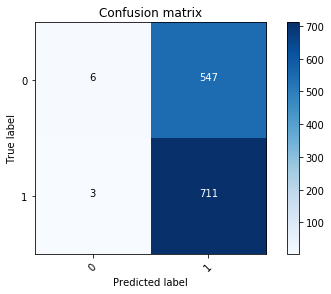

In [61]:
y_pred = model.predict(data_test)
for i in range(len(y_pred)):
    if(y_pred[i]>0.5):
        y_pred[i]=1
    else: 
        y_pred[i]=0
        
score = metrics.accuracy_score(testy, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(testy, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0,1])

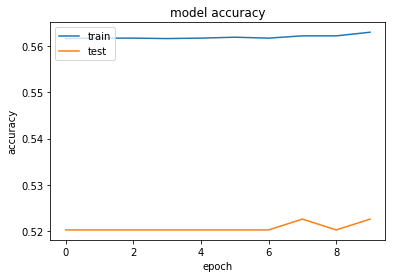

In [63]:
plt.plot(history_ltsm.history['acc'])
plt.plot(history_ltsm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()